In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd
import re
import seaborn as sns
import wave
from tqdm import tqdm

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [2]:
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

In [3]:
def load_wav(filename):
    data, _ = librosa.load(filename, sr=16000, mono=True, res_type='kaiser_fast')
    return tf.convert_to_tensor(data, dtype=tf.float32)
    # return data

# def load_wav(filename):
#     """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
#     file_contents = tf.io.read_file(filename)
#     wav, sample_rate = tf.audio.decode_wav(
#           file_contents,
#           desired_channels=1)
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav

def extract_embeddings(data, label, fold):
    _, embeddings, _ = yamnet_model(data)
    num_embeddings = tf.shape(embeddings)[0]
    return (embeddings, tf.repeat(label, num_embeddings),
            tf.repeat(fold, num_embeddings))

# Building DataFrame

In [4]:
Crema_Path='../Datasets/Crema'
Ravdess_Path='../Datasets/Ravdess/'
Savee_Path='../Datasets/Savee/'
Tess_Path='../Datasets/Tess/'

In [5]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,angry,../Datasets/Crema/1001_DFA_ANG_XX.wav
1,disgust,../Datasets/Crema/1001_DFA_DIS_XX.wav
2,fear,../Datasets/Crema/1001_DFA_FEA_XX.wav
3,happy,../Datasets/Crema/1001_DFA_HAP_XX.wav
4,neutral,../Datasets/Crema/1001_DFA_NEU_XX.wav


In [6]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-01...
1,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-02...
2,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-01...
3,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-02...
4,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-01-01...


In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,angry,../Datasets/Savee//DC_a01.wav
1,angry,../Datasets/Savee//DC_a02.wav
2,angry,../Datasets/Savee//DC_a03.wav
3,angry,../Datasets/Savee//DC_a04.wav
4,angry,../Datasets/Savee//DC_a05.wav


In [8]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,angry,../Datasets/Tess/OAF_angry\OAF_back_angry.wav
1,angry,../Datasets/Tess/OAF_angry\OAF_bar_angry.wav
2,angry,../Datasets/Tess/OAF_angry\OAF_base_angry.wav
3,angry,../Datasets/Tess/OAF_angry\OAF_bath_angry.wav
4,angry,../Datasets/Tess/OAF_angry\OAF_bean_angry.wav


In [9]:
# main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df=pd.concat([Ravdess_df, Tess_df],axis=0)
main_df.shape

(4240, 2)

In [10]:
main_df.head(15)

,Emotion,File_Path
0,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-01...
1,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-02...
2,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-01...
3,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-02...
4,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-01-01...
5,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-01-02...
6,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-02-01...
7,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-02-02...
8,neutral,../Datasets/Ravdess/Actor_01\03-01-02-02-01-01...
9,neutral,../Datasets/Ravdess/Actor_01\03-01-02-02-01-02...


In [11]:
main_df = main_df[main_df['Emotion'] != 'surprise']

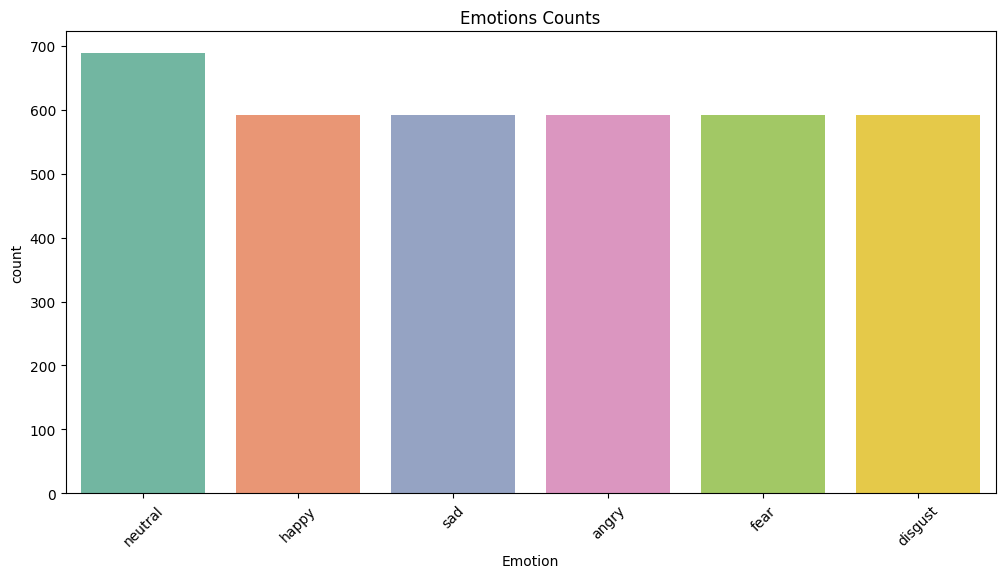

In [12]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [13]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

main_df['Emotion'] = main_df['Emotion'].apply(lambda emotion: classes.index(emotion))

In [14]:
main_df.head(20)

,Emotion,File_Path
0,4,../Datasets/Ravdess/Actor_01\03-01-01-01-01-01...
1,4,../Datasets/Ravdess/Actor_01\03-01-01-01-01-02...
2,4,../Datasets/Ravdess/Actor_01\03-01-01-01-02-01...
3,4,../Datasets/Ravdess/Actor_01\03-01-01-01-02-02...
4,4,../Datasets/Ravdess/Actor_01\03-01-02-01-01-01...
5,4,../Datasets/Ravdess/Actor_01\03-01-02-01-01-02...
6,4,../Datasets/Ravdess/Actor_01\03-01-02-01-02-01...
7,4,../Datasets/Ravdess/Actor_01\03-01-02-01-02-02...
8,4,../Datasets/Ravdess/Actor_01\03-01-02-02-01-01...
9,4,../Datasets/Ravdess/Actor_01\03-01-02-02-01-02...


In [15]:
main_df.shape

(3648, 2)

In [16]:
df1, df2, df3, df4, df5 = np.array_split(main_df, 5)

df1['fold'] = [1] * len(df1)
df2['fold'] = [2] * len(df2)
df3['fold'] = [3] * len(df3)
df4['fold'] = [4] * len(df4)
df5['fold'] = [5] * len(df5)

main_df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [17]:
main_df.shape

(3648, 3)

# Getting Embeddings

In [18]:
tqdm.pandas()
main_df['data'] = main_df['File_Path'].progress_apply(lambda path: load_wav(path))

100%|██████████| 3648/3648 [01:30<00:00, 40.16it/s]


In [20]:
# excluded_files = []
# for _, row in tqdm(main_df.iterrows(), total=main_df.shape[0]):
#     if(sum(row['data']) == 0):
#         excluded_files.append(row['File_Path'])

# main_df = main_df[~main_df['File_Path'].isin(excluded_files)]

100%|██████████| 3648/3648 [00:19<00:00, 191.91it/s]


In [19]:
main_ds = tf.data.Dataset.from_tensor_slices((main_df['data'], main_df['Emotion'], main_df['fold']))
main_ds.element_spec

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

In [44]:
def load_wav_for_map(filename, label, fold):
  return load_wav(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
main_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [45]:
# extract embedding
main_ds = main_ds.map(extract_embeddings).unbatch()
main_ds.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [46]:
cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [64]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
], name='shitty_model')

my_model.summary()

Model: "shitty_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 527,878
Trainable params: 527,878
Non-trainable params: 0
_________________________________________________________________


In [65]:
my_model.compile(loss='categorical_crossentropy',
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model.fit(train_ds,
                       epochs=20,
                       validation_data=val_ds,
                       callbacks=callback)

In [ ]:
loss, accuracy = my_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# result = my_model(embeddings).numpy()

# inferred_class = classes[result.mean(axis=0).argmax()]
# print(f'The main sound is: {inferred_class}')